<a href="https://colab.research.google.com/github/areeratg/ed-pytrend/blob/main/pytrendsExpander.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pytrends

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

--2020-05-05 16:25:24--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2020-05-05 16:25:25--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘thsarabunnew-webfont.ttf’

thsarabunnew-webfon 100%[===================>]  96.00K  --.-KB/s    in 0.03s   

2020-05-05 16:25:25 (3.05 MB/s) - ‘thsara

In [ ]:
class pytrendsExpander():
      
  def __init__(self, keyword):
    
    import pandas as pd
    from pytrends.request import TrendReq

    self.keyword = keyword
    self.pytrends = TrendReq()
    self.df = pd.DataFrame()
  
  def expand_search(self, m):
    
    #pytrends = TrendReq()
    pytrends = self.pytrends

    #get seed keyword
    kw_list=[self.keyword]
    pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m' , geo='TH', gprop='')

    #get results from the seed keyword
    queries = pytrends.related_queries()

    #store the results in the data frame
    import pandas as pd
    df_results = pd.DataFrame(queries.get(self.keyword).get('top').rename_axis('ranking').reset_index())
    df_results['keyword'] = self.keyword

    #store original related queries
    lst_related_keywords = df_results['query'].to_list()

    #prepare the list for the next search
    lst_related_keywords_omitted = [kw.replace(self.keyword, "") for kw in lst_related_keywords]
    lst_related_keywords_omitted = [kw.replace(" ", "") for kw in lst_related_keywords_omitted]

    #create the lookup dictionary for the original keywords and omitted keywords
    kw_dict = dict(zip(lst_related_keywords_omitted, lst_related_keywords))

    #determine number of loops for the 2nd search given the limitattion of 5 keywords
    if (len(lst_related_keywords_omitted) % 5) == 0:
      no_loops = int(len(lst_related_keywords_omitted)) / 5
    else:
      no_loops = int(len(lst_related_keywords_omitted) / 5) + 1

    #perform the 2nd research from the related queries
    for loop_no in range(0, no_loops):
      kw_list = lst_related_keywords_omitted[loop_no*5: loop_no*5+5]
      pytrends.build_payload(kw_list, cat=0, timeframe='today 1-m' , geo='TH', gprop='')
      expanded_queries = pytrends.related_queries()

      for keyword in kw_list:
        if expanded_queries.get(keyword).get('top') is not None:
          df_temp = pd.DataFrame(expanded_queries.get(keyword).get('top').rename_axis('ranking').reset_index())
          df_temp['keyword'] = kw_dict.get(keyword)

          df_results = df_results.append(df_temp)
    
    self.df = df_results

  def plot_results(self, spacing):
  
    import networkx as nx                 
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as fm

    font_list = fm.createFontList(['thsarabunnew-webfont.ttf'])
    fm.fontManager.ttflist.extend(font_list)

    fig, ax=plt.subplots(figsize=(25,25))

    G=nx.from_pandas_edgelist(self.df,source='keyword',target='query', edge_attr=['ranking', 'value'])
    weights = [i['value']/100 for i in dict(G.edges).values()]
    pos = nx.spring_layout(G)

    labels_params = {"font_family":"TH Sarabun New", "alpha":.7, "font_size":10 }

    nx.draw_spring(G, with_labels=True, length = spacing, width=weights, **labels_params)

    plt.show()
        

In [ ]:
#@title Keyword
keyword = "\u0E40\u0E17\u0E35\u0E48\u0E22\u0E27" #@param {type:"string"}
search = pytrendsExpander(keyword)

In [ ]:
#@title No. of months
no_months =  1#@param {type:"integer"}
search.expand_search(no_months)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.


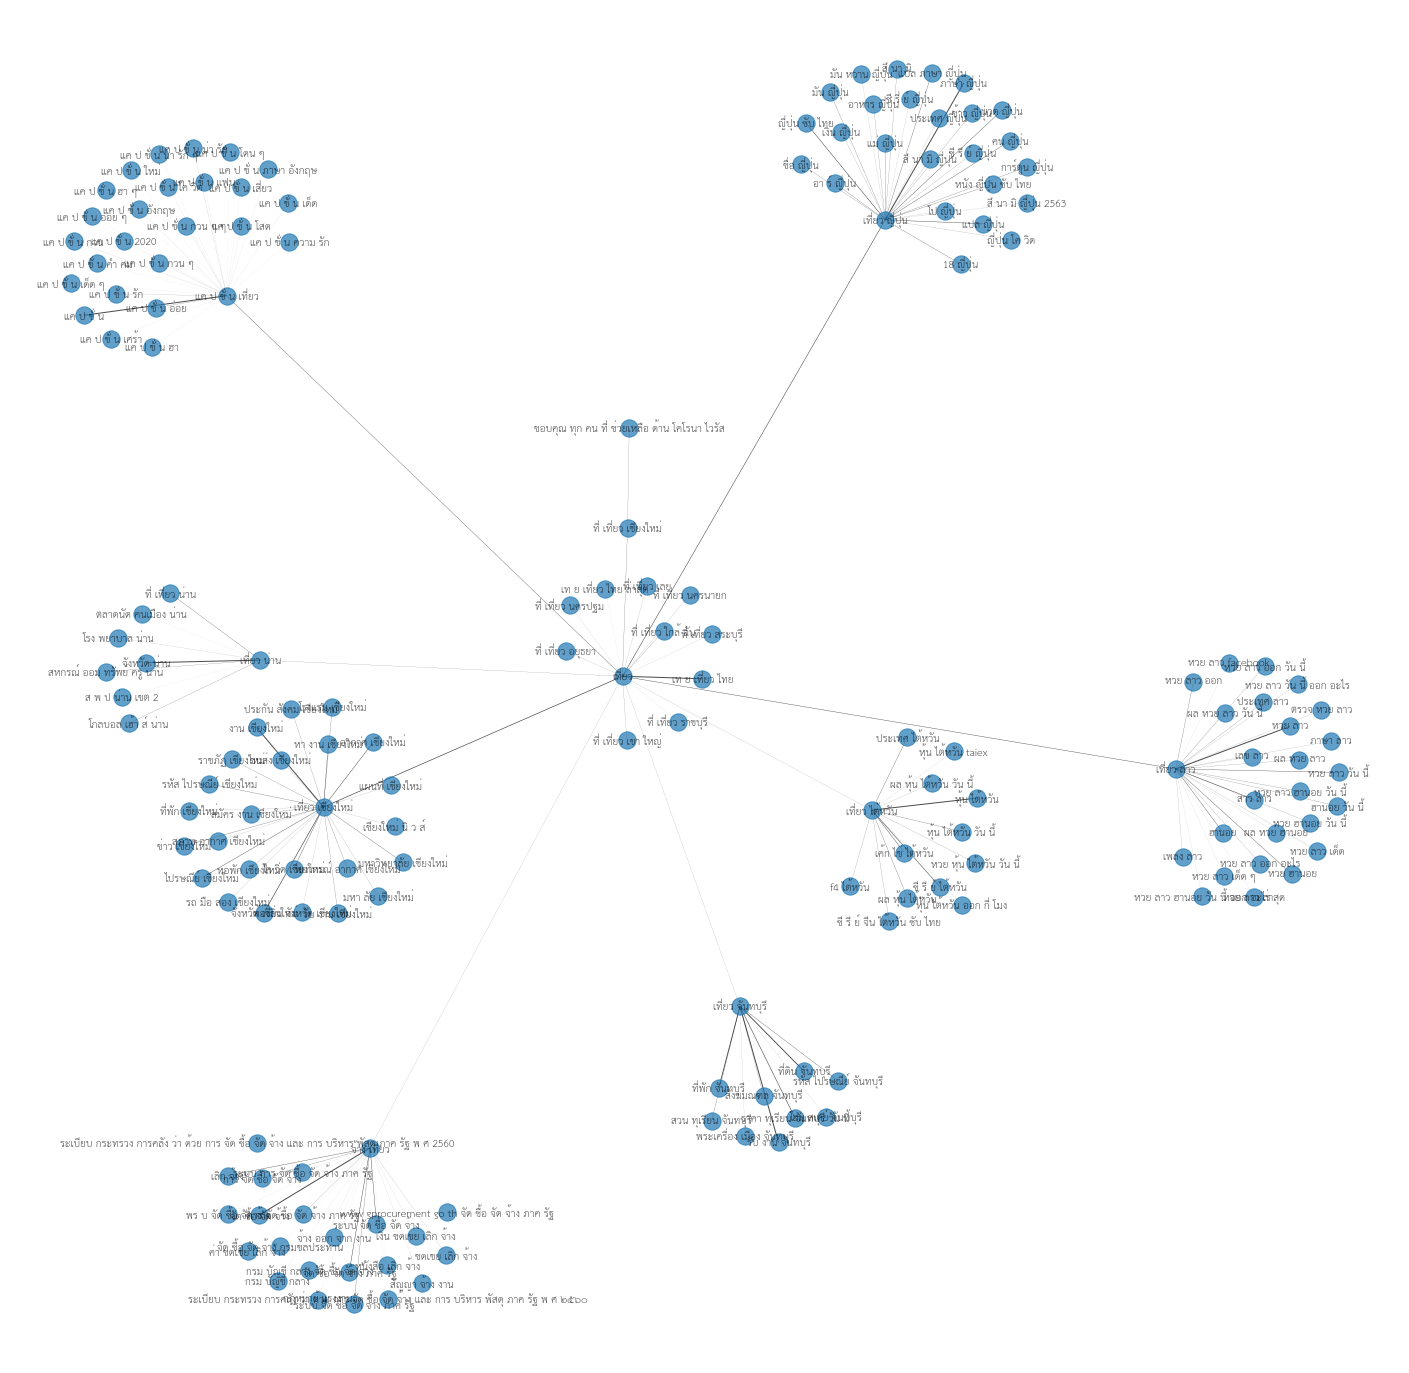

In [ ]:
#@title Plot spacing
spacing =  10#@param {type:"integer"}
search.plot_results(10)